# Network Analysis Project

In [1]:
import networkx as nx
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from random import randint

Import the dataset extracted with R

In [2]:
df = pd.read_csv("../dataset/dataset.csv")

In [3]:
G = nx.Graph()

In [4]:
people = set(df[['person', 'category']].itertuples(index=False, name=None))

In [5]:
for person in people:
    name = person[0]
    role = person[1]
    G.add_node(name)
    G.nodes[name]['role'] = role

In [6]:
actor_pairs = df.groupby("movie")["person"].apply(list)
for actors in tqdm(actor_pairs):
    for actor1 in actors:
        for actor2 in actors:
            if actor1 != actor2:
                if G.has_edge(actor1, actor2):
                    G[actor1][actor2]["weight"] += 1
                else:
                    G.add_edge(actor1, actor2, weight=1)

100%|██████████| 2967/2967 [00:00<00:00, 14922.84it/s]


Edge with the highest weight

In [7]:
max(dict(G.edges).items(), key=lambda x: x[1]['weight'])

(('Eric Fellner', 'Tim Bevan'), {'weight': 66})

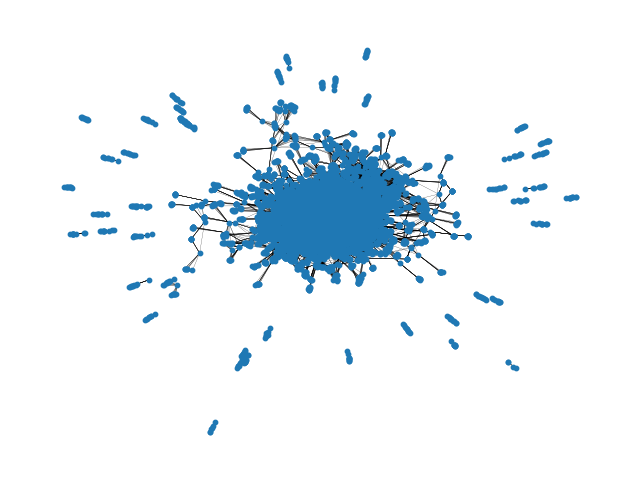

In [8]:
# Plotting options
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}

# Layout the graph using spring layout (you can change the layout method if needed)
pos = nx.spring_layout(G, iterations=20, seed=1721)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Turn off axis labels
ax.axis("off")

# Draw the network
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)

# Add a title to the plot
# ax.set_title("Original Network")

# Save the plot as an image file (e.g., PNG)
plt.savefig("network_plot.png", format="png", dpi=300, bbox_inches="tight")

# Show the plot (optional, depending on your use case)
plt.show()

In [9]:
nx.number_connected_components(G)

46

Print all small connected components

In [10]:
connected_components = list(nx.connected_components(G))

# Iterate through the connected components and print nodes for those with fewer than 10 nodes
for component in connected_components:
    if len(component) < 20:
        print("Nodes in the subgraph:", component)

Nodes in the subgraph: {'Travis Willingham', 'Kent Williams', 'Vic Mignogna', 'Caitlin Glass', 'Colleen Clinkenbeard', 'Iemasa Kayumi', 'Matthew Leonhart', 'Hiromu Arakawa', 'Christopher Sabat', 'Lili Troncale', 'Aaron Dismuke', 'Maxey Whitehead', 'Muriel Hofmann', 'Romi Park', 'Rie Kugimiya', 'Maria Tamar', 'Tôru Ohkawa'}
Nodes in the subgraph: {'Deniz Baysal', 'Nisa Sofiya Aksongur', 'Saner Ayar', 'Hasan Ozsut', 'Kubilay Tat', 'Torben Forsberg', 'Sinan Turan', 'Celile Toyon Uysal', 'Mehmet Ada Öztekin', 'Aras Bulut Iynemli'}
Nodes in the subgraph: {'Haluk Bilginer', 'Ayberk Pekcan', 'Anton Chekhov', 'Ebru Ceylan', 'Muzaffer Yildirim', 'Gökhan Tiryaki', 'Nuri Bilge Ceylan', 'Zeynep Özbatur Atakan', 'Melisa Sözen', 'Demet Akbag'}
Nodes in the subgraph: {'Özge Özberk', 'Zumrut Arol Bekce', 'Ömer Faruk Sorak', 'Safak Sezer', 'Ozan Çolakoglu', 'Can Yilmaz', 'Veli Kuzlu', 'Cem Yilmaz', 'Ozan Güven', 'Necati Akpinar'}
Nodes in the subgraph: {'Lee Jun-Ho', 'Kim Young-ok', 'Sun-young Kim', 'K

In [11]:
# Iterate through the connected components and print nodes for those with fewer than 10 nodes
for component in connected_components:
    # if len(component) < 20:
        print("Nodes in the subgraph:", len(component))

Nodes in the subgraph: 13455
Nodes in the subgraph: 17
Nodes in the subgraph: 10
Nodes in the subgraph: 24
Nodes in the subgraph: 10
Nodes in the subgraph: 10
Nodes in the subgraph: 10
Nodes in the subgraph: 17
Nodes in the subgraph: 10
Nodes in the subgraph: 10
Nodes in the subgraph: 10
Nodes in the subgraph: 10
Nodes in the subgraph: 10
Nodes in the subgraph: 10
Nodes in the subgraph: 10
Nodes in the subgraph: 18
Nodes in the subgraph: 10
Nodes in the subgraph: 10
Nodes in the subgraph: 10
Nodes in the subgraph: 10
Nodes in the subgraph: 9
Nodes in the subgraph: 10
Nodes in the subgraph: 10
Nodes in the subgraph: 10
Nodes in the subgraph: 10
Nodes in the subgraph: 10
Nodes in the subgraph: 9
Nodes in the subgraph: 10
Nodes in the subgraph: 10
Nodes in the subgraph: 10
Nodes in the subgraph: 10
Nodes in the subgraph: 9
Nodes in the subgraph: 10
Nodes in the subgraph: 10
Nodes in the subgraph: 8
Nodes in the subgraph: 10
Nodes in the subgraph: 10
Nodes in the subgraph: 10
Nodes in the 

In [12]:
G.number_of_nodes()

13924

In [13]:
G.number_of_edges()

127154

In [14]:
np.mean([d for _, d in G.degree()])

18.26400459638035

Find largest connected subgraph

In [15]:
largest_connected_component = max(connected_components, key=len)
largest_connected_subgraph = G.subgraph(largest_connected_component)

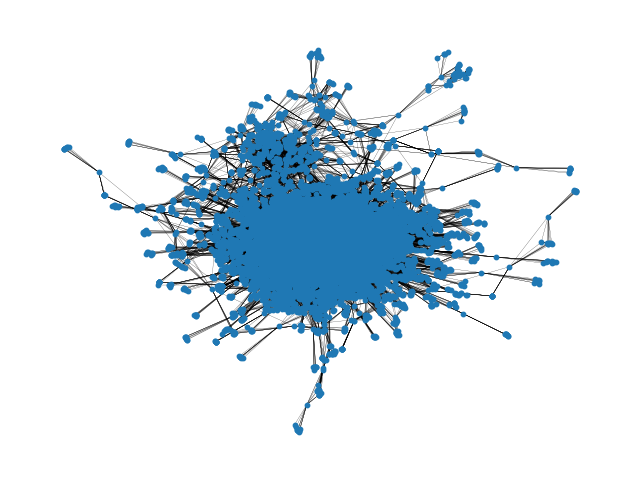

In [16]:
# Plotting options
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}

# Layout the graph using spring layout (you can change the layout method if needed)
pos = nx.spring_layout(largest_connected_subgraph, iterations=20, seed=1721)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Turn off axis labels
ax.axis("off")

# Draw the network
nx.draw_networkx(largest_connected_subgraph, pos=pos, ax=ax, **plot_options)

# Add a title to the plot
# ax.set_title("Largest Connected Subgraph")

# Save the plot as an image file (e.g., PNG)
plt.savefig("network_plot_subgraph.png", format="png", dpi=300, bbox_inches="tight")

# Show the plot (optional, depending on your use case)
plt.show()

In [18]:
largest_connected_subgraph.number_of_nodes()

13455

In [23]:
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(largest_connected_subgraph))

In [20]:
pd.DataFrame(shortest_path_lengths).to_csv('shortest_path_lengths.csv')

In [22]:
shortest_path_lengths['Matt Damon']['Quentin Tarantino']  # Length of shortest path between Matt Damon and Quentin Tarantino

2

In [23]:
# This is equivalent to `diameter = nx.diameter(G), but much more efficient since we're
# reusing the pre-computed shortest path lengths!
diameter = max(nx.eccentricity(largest_connected_subgraph, sp=shortest_path_lengths).values())
diameter

15

In [24]:
# Compute the average shortest path length for each node
average_path_lengths = [
    np.mean(list(spl.values())) for spl in shortest_path_lengths.values()
]
# The average over all nodes
np.mean(average_path_lengths)

3.905381255574654

Text(154.47222222222223, 0.5, 'Frequency (%)')

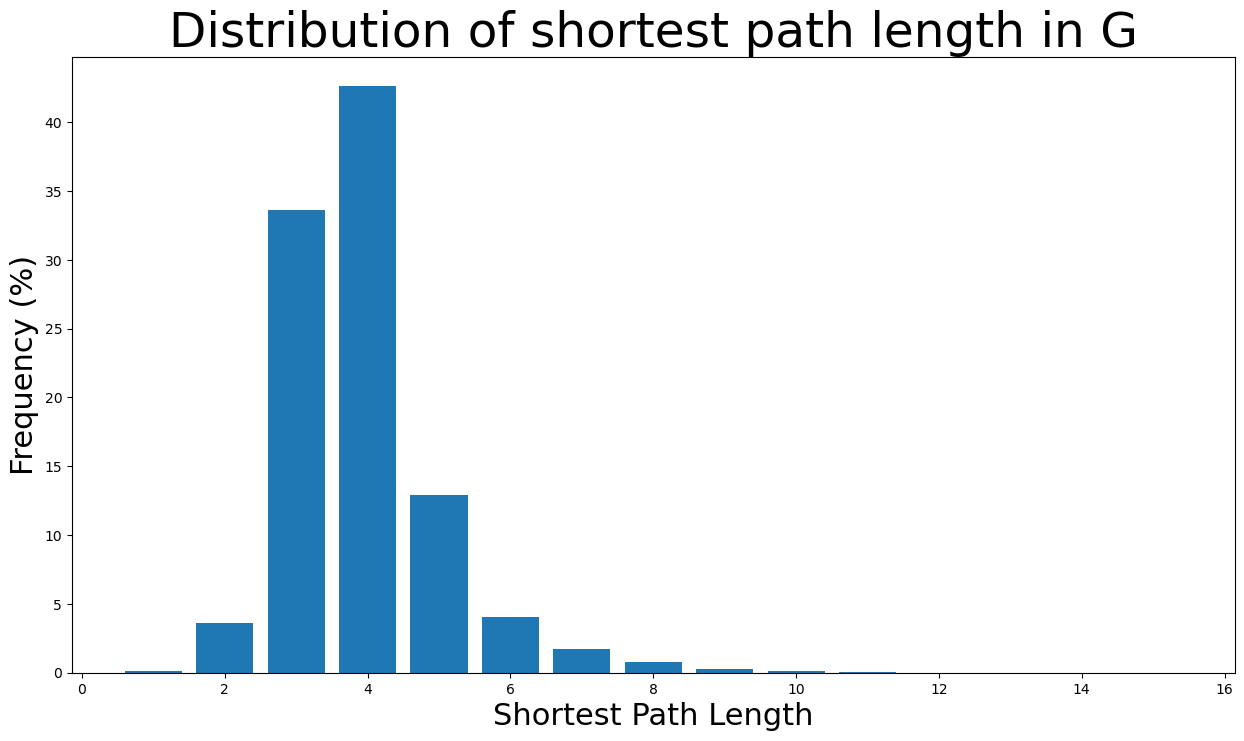

In [27]:
# We know the maximum shortest path length (the diameter), so create an array
# to store values from 0 up to (and including) diameter
path_lengths = np.zeros(diameter + 1, dtype=int)

# Extract the frequency of shortest path lengths between two nodes
for pls in shortest_path_lengths.values():
    pl, cnts = np.unique(list(pls.values()), return_counts=True)
    path_lengths[pl] += cnts

# Express frequency distribution as a percentage (ignoring path lengths of 0)
freq_percent = 100 * path_lengths[1:] / path_lengths[1:].sum()

# Plot the frequency distribution (ignoring path lengths of 0) as a percentage
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(np.arange(1, diameter + 1), height=freq_percent)
ax.set_title(
    "Distribution of shortest path length in G", fontdict={"size": 35}, loc="center"
)

plt.savefig("spl_distribution.png", format="png", dpi=300, bbox_inches="tight")

ax.set_xlabel("Shortest Path Length", fontdict={"size": 22})
ax.set_ylabel("Frequency (%)", fontdict={"size": 22})

In [28]:
nx.density(largest_connected_subgraph)

0.0013819526374383182

In [64]:
degree_centrality = nx.centrality.degree_centrality(
    largest_connected_subgraph
)  # save results in a variable to use again
(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))[:10]

[('Mark Wahlberg', 0.019994053812992418),
 ('Tim Bevan', 0.019250780437044743),
 ('Samuel L. Jackson', 0.01880481641147614),
 ('Ryan Reynolds', 0.018284525048312766),
 ('Jason Blum', 0.018284525048312766),
 ('Dwayne Johnson', 0.017987215697933698),
 ('Scott Rudin', 0.017838561022744163),
 ('Colin Farrell', 0.017764233685149396),
 ('Matt Damon', 0.017541251672365095),
 ('Scarlett Johansson', 0.017466924334770328)]

In [65]:
pd.DataFrame((sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))[:10], columns=('person', 'centrality'))

,person,centrality
0,Mark Wahlberg,0.019994
1,Tim Bevan,0.019251
2,Samuel L. Jackson,0.018805
3,Ryan Reynolds,0.018285
4,Jason Blum,0.018285
5,Dwayne Johnson,0.017987
6,Scott Rudin,0.017839
7,Colin Farrell,0.017764
8,Matt Damon,0.017541
9,Scarlett Johansson,0.017467


In [66]:
largest_connected_subgraph.nodes['Matt Damon']

{'role': 'producer'}

In [67]:
(sorted(largest_connected_subgraph.degree, key=lambda item: item[1], reverse=True))[:10]

[('Mark Wahlberg', 269),
 ('Tim Bevan', 259),
 ('Samuel L. Jackson', 253),
 ('Ryan Reynolds', 246),
 ('Jason Blum', 246),
 ('Dwayne Johnson', 242),
 ('Scott Rudin', 240),
 ('Colin Farrell', 239),
 ('Matt Damon', 236),
 ('Scarlett Johansson', 235)]

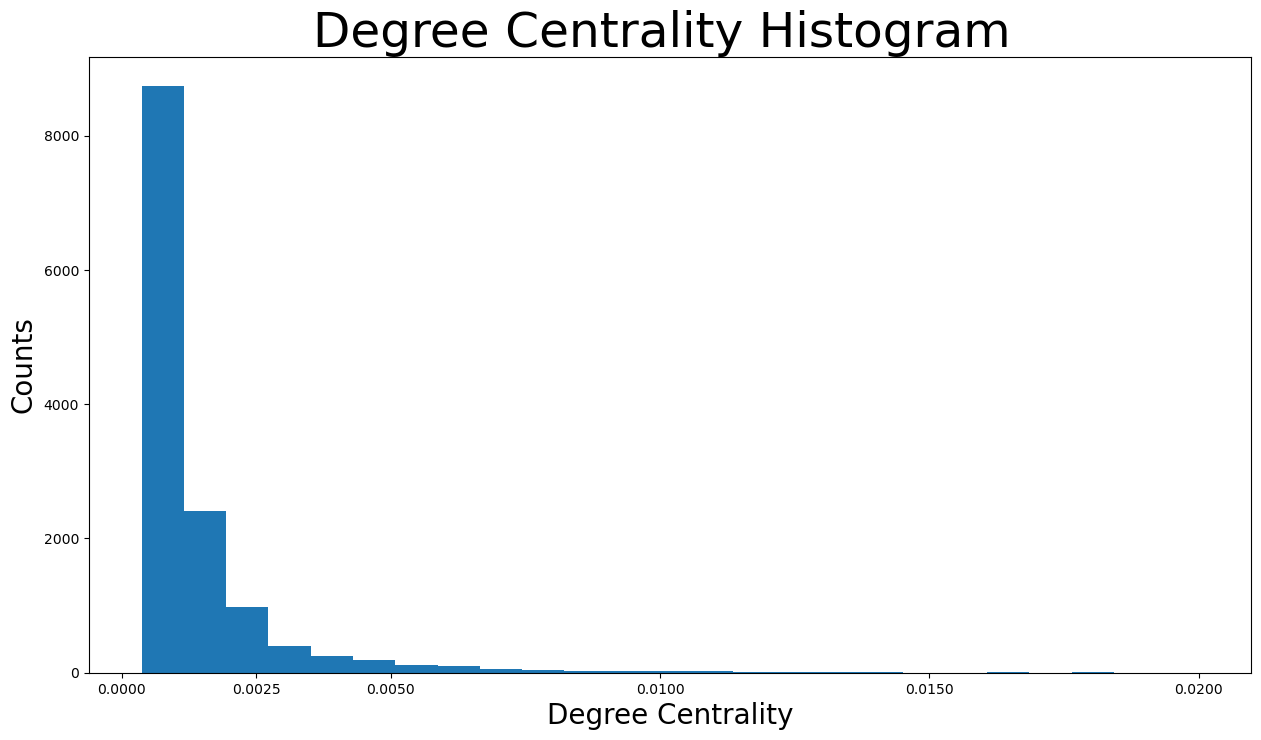

In [68]:
plt.figure(figsize=(15, 8))
plt.hist(degree_centrality.values(), bins=25)
plt.xticks(ticks=[0, 0.0025, 0.005, 0.01, 0.015, 0.02])  # set the x axis ticks
plt.title("Degree Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Degree Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})
plt.savefig("dc_distribution.png", format="png", dpi=300, bbox_inches="tight")

In [70]:
betweenness_centrality = nx.centrality.betweenness_centrality(
    largest_connected_subgraph
)  # save results in a variable to use again
(sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True))[:10]

[('Mamoru Miyano', 0.017452998199271687),
 ('Dwayne Johnson', 0.015563961955218789),
 ('Samuel L. Jackson', 0.015443228817894797),
 ('A.R. Rahman', 0.014450416801310664),
 ('Irrfan Khan', 0.014133112300587017),
 ('Jason Blum', 0.013083689661220184),
 ('Mark Wahlberg', 0.011957929086134715),
 ('Priyanka Chopra Jonas', 0.011877630462279055),
 ('Jason Statham', 0.011553571887112918),
 ('Anupam Kher', 0.011451257280500336)]

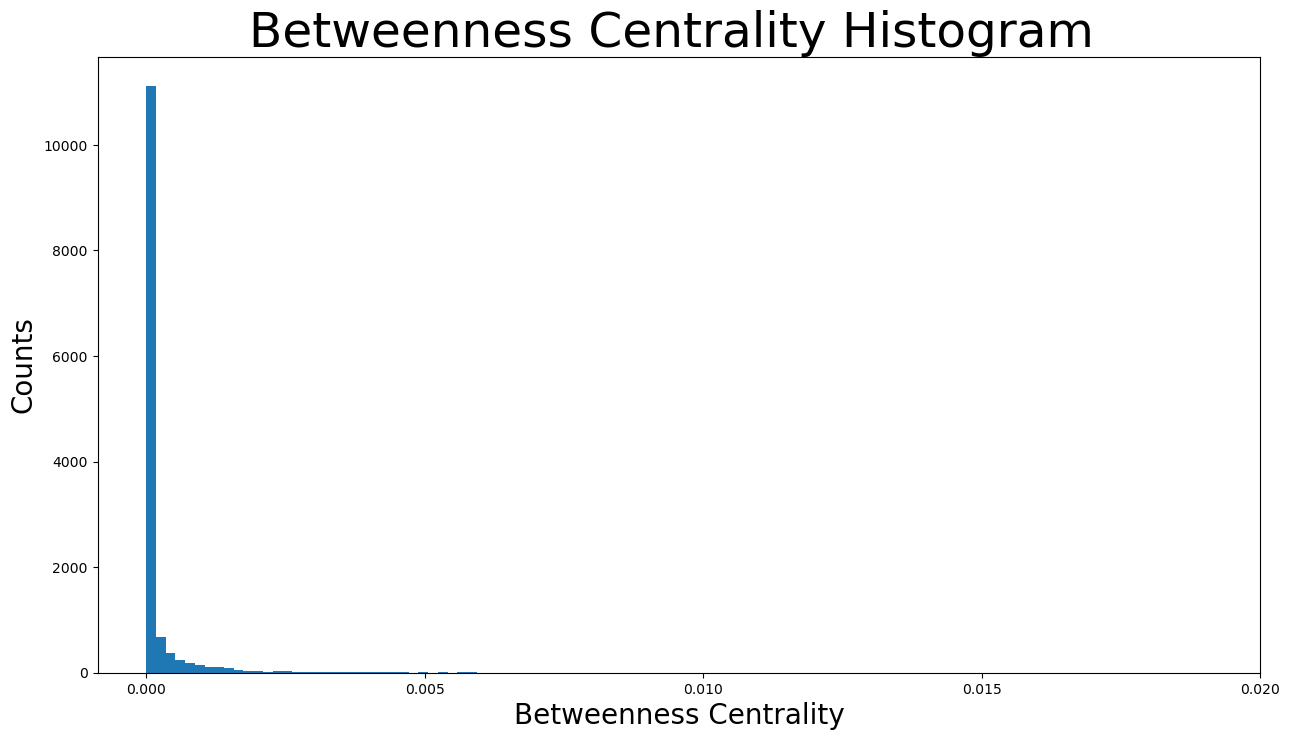

In [73]:
plt.figure(figsize=(15, 8))
plt.hist(betweenness_centrality.values(), bins=100)
plt.xticks(ticks=[0, 0.005, 0.01, 0.015, 0.02])  # set the x axis ticks
plt.title("Betweenness Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Betweenness Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})
plt.savefig("bc_distribution.png", format="png", dpi=300, bbox_inches="tight")


(-0.8944636812806129,
 1.1786100497841836,
 -0.9484680390357971,
 1.1851485466957092)

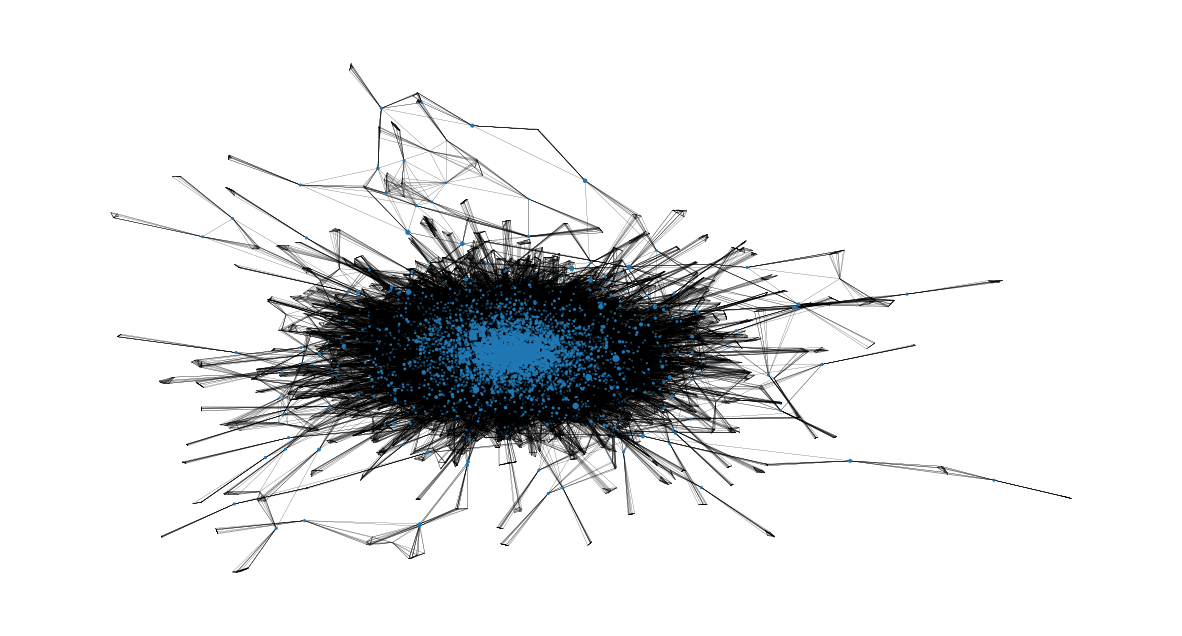

In [75]:
node_size = [
    v * 1200 for v in betweenness_centrality.values()
]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15, 8))
nx.draw_networkx(largest_connected_subgraph, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")

In [76]:
eigenvector_centrality = nx.centrality.eigenvector_centrality(
    largest_connected_subgraph
)  # save results in a variable to use again
(sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True))[:10]

[('Mark Wahlberg', 0.09345106189228108),
 ('Matt Damon', 0.08901156866540383),
 ('Scott Rudin', 0.08809646494250994),
 ('Tim Bevan', 0.08536223710088965),
 ('Cate Blanchett', 0.08447574180613111),
 ('Colin Farrell', 0.080867389327522),
 ('Brad Pitt', 0.07798747626213064),
 ('Christian Bale', 0.07694486247258023),
 ('Ryan Reynolds', 0.07555510497110884),
 ('Eric Fellner', 0.07522259096236927)]

(-0.8944636812806129,
 1.1786100497841836,
 -0.9484680390357971,
 1.1851485466957092)

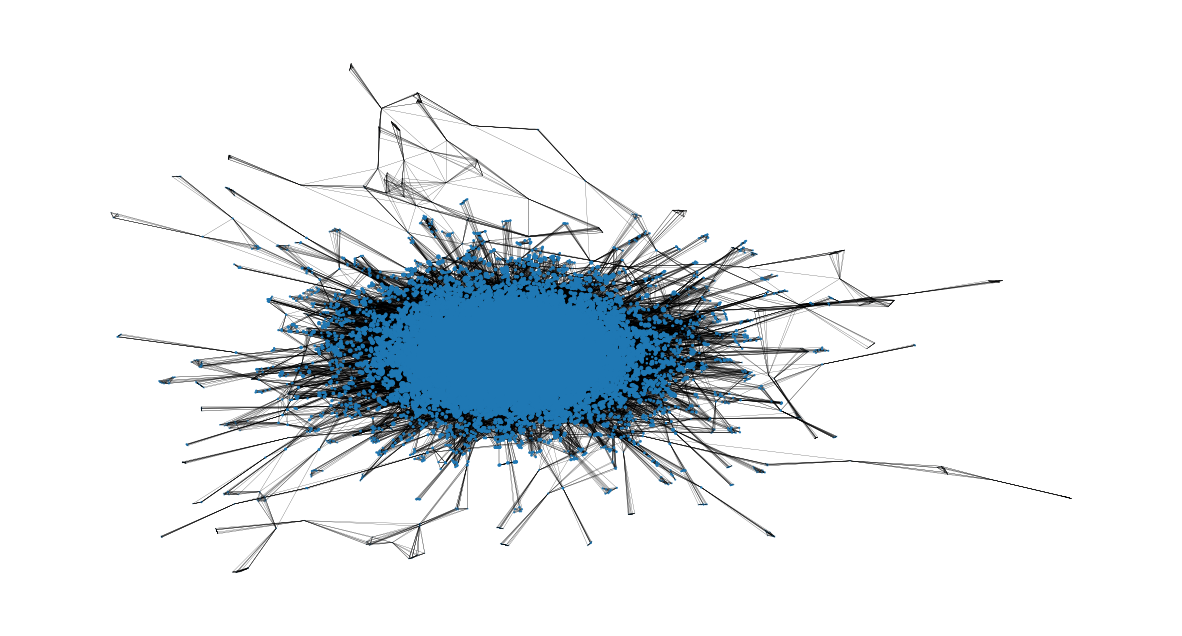

In [77]:
node_size = [
    v * 4000 for v in eigenvector_centrality.values()
]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15, 8))
nx.draw_networkx(largest_connected_subgraph, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")

In [78]:
nx.average_clustering(largest_connected_subgraph)

0.7779605217704484

Text(0, 0.5, 'Counts')

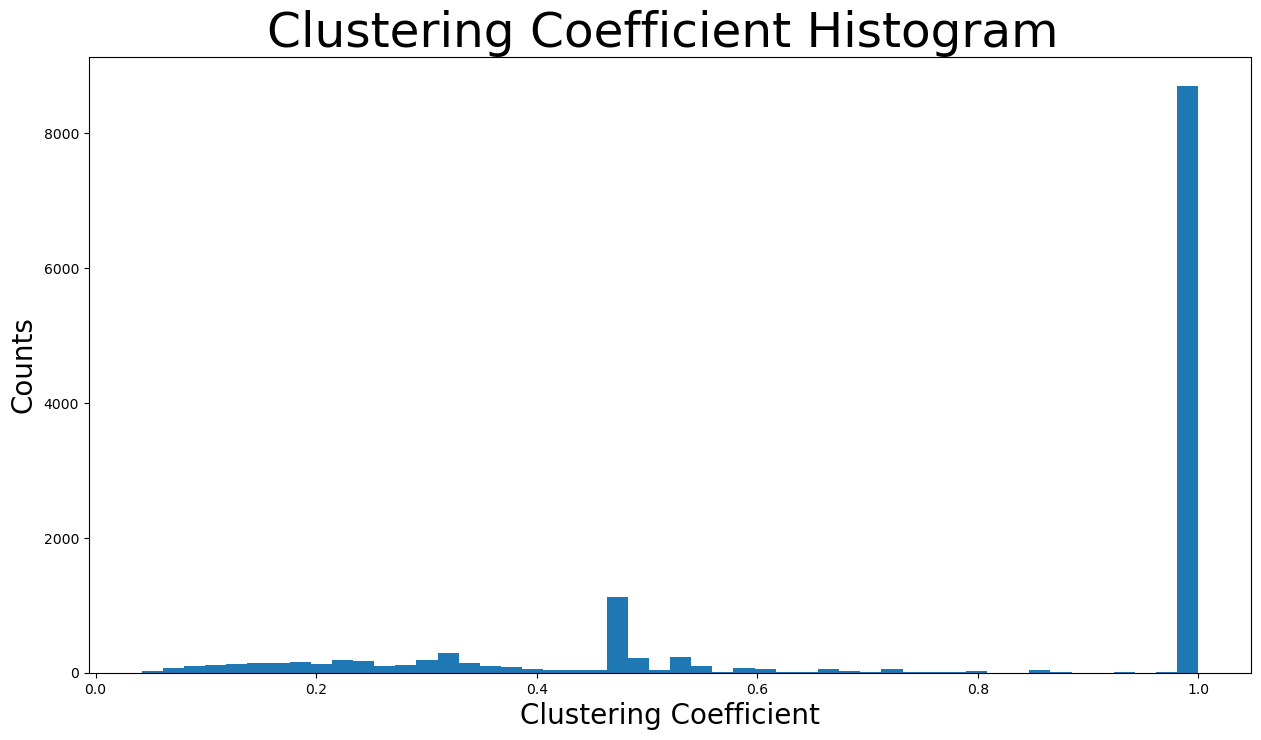

In [79]:
plt.figure(figsize=(15, 8))
plt.hist(nx.clustering(largest_connected_subgraph).values(), bins=50)
plt.title("Clustering Coefficient Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Clustering Coefficient", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

In [80]:
triangles_per_node = list(nx.triangles(largest_connected_subgraph).values())
sum(
    triangles_per_node
) / 3  # divide by 3 because each triangle is counted once for each node

383525.0

In [81]:
np.mean(triangles_per_node)

85.51282051282051

In [82]:
np.median(triangles_per_node)

36.0

In [89]:
colors = ["" for x in range(largest_connected_subgraph.number_of_nodes())]  # initialize colors list
colors = []
counter = 0
for com in nx.community.label_propagation_communities(largest_connected_subgraph):
    color = "#%06X" % randint(0, 0xFFFFFF)  # creates random RGB color
    counter += 1
    for node in list(
        com
    ):  # fill colors list with the particular color for the community nodes
        # colors[node] = color
        colors.append(color)
counter

390

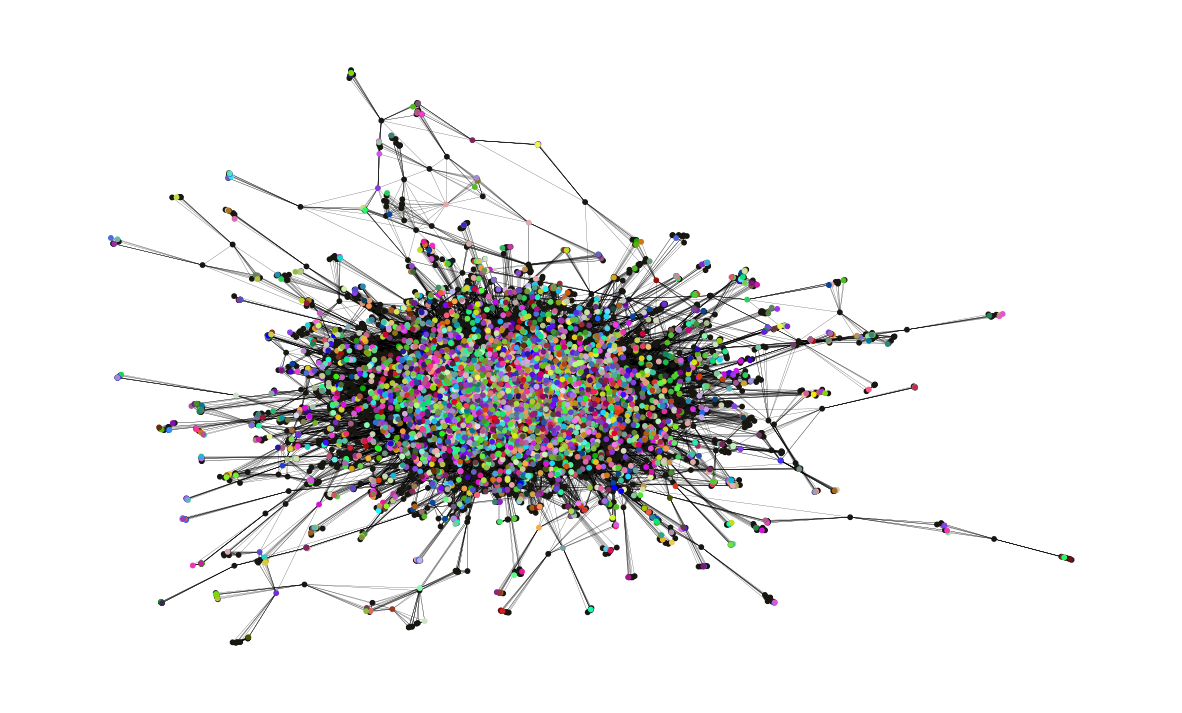

In [90]:
plt.figure(figsize=(15, 9))
plt.axis("off")
nx.draw_networkx(
    largest_connected_subgraph, pos=pos, node_size=10, with_labels=False, width=0.15, node_color=colors
)

In [16]:
# Compute the clustering coefficient (C) and average shortest path length (L)
C = nx.average_clustering(largest_connected_subgraph)
L = nx.average_shortest_path_length(largest_connected_subgraph)

# Generate a random graph with the same number of nodes and edges as G
random_graph = nx.gnm_random_graph(len(largest_connected_subgraph.nodes()), len(largest_connected_subgraph.edges()))

# Compute the clustering coefficient and average shortest path length for the random graph
C_random = nx.average_clustering(random_graph)
L_random = nx.average_shortest_path_length(random_graph)

# Compute the small-worldness (sigma) using the formula
sigma = (C / C_random) / (L / L_random)

# Determine if the network exhibits the small-world effect based on sigma
if sigma > 1:
    small_world_effect = "The network exhibits the small-world effect."
else:
    small_world_effect = "The network does not exhibit the small-world effect."

# Print the results
print(f"Clustering Coefficient (C): {C}")
print(f"Average Shortest Path Length (L): {L}")
print(f"Clustering Coefficient (C_random): {C_random}")
print(f"Average Shortest Path Length (L_random): {L_random}")
print(f"Small-Worldness (sigma): {sigma}")
print(small_world_effect)

Clustering Coefficient (C): 0.7779605217704513
Average Shortest Path Length (L): 3.905671532165673
Clustering Coefficient (C_random): 0.0013871099963049401
Average Shortest Path Length (L_random): 3.5855526216834637
Small-Worldness (sigma): 514.8812085211994
The network exhibits the small-world effect.


average degree of users graph:  [0, 0, 0, 0, 0, 8, 17, 46, 77, 8292, 6, 14, 40, 34, 79, 126, 154, 287, 1334, 176, 30, 39, 27, 63, 69, 114, 122, 405, 51, 16, 35, 34, 42, 73, 48, 80, 198, 34, 24, 17, 31, 29, 35, 43, 53, 86, 28, 16, 18, 16, 13, 26, 32, 43, 50, 22, 11, 21, 18, 14, 15, 20, 30, 31, 12, 12, 12, 14, 14, 12, 14, 17, 23, 8, 2, 7, 7, 7, 13, 10, 14, 19, 7, 4, 6, 8, 8, 9, 7, 11, 8, 5, 3, 3, 3, 3, 5, 7, 6, 4, 6, 6, 4, 3, 4, 8, 5, 4, 3, 4, 3, 4, 2, 2, 3, 6, 4, 0, 3, 1, 3, 3, 4, 4, 2, 3, 4, 1, 5, 4, 1, 3, 3, 2, 1, 3, 1, 1, 2, 1, 1, 3, 3, 5, 1, 1, 1, 1, 2, 1, 3, 2, 3, 3, 5, 1, 0, 0, 0, 3, 1, 0, 1, 1, 1, 1, 0, 2, 1, 2, 1, 0, 2, 0, 1, 1, 2, 0, 2, 3, 1, 1, 0, 2, 0, 0, 1, 1, 0, 1, 0, 0, 3, 1, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


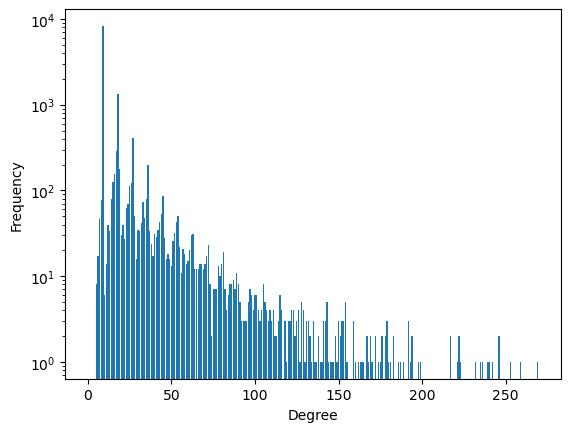

In [16]:

#convert the graph to a directed graph
largest_connected_subgraph_d = largest_connected_subgraph.to_directed()
def average_shortest_path_length(users_subgraph_d):
    # compute the strongly connected components of the graph
    components = nx.strongly_connected_components(users_subgraph_d)

    # compute the average shortest path length for each component
    avg_shortest_path_lengths = []
    for component in components:
        subgraph = users_subgraph_d.subgraph(component)
        avg_shortest_path_length = nx.average_shortest_path_length(subgraph)
        avg_shortest_path_lengths.append(avg_shortest_path_length)

    # compute the overall average shortest path length
    overall_avg_shortest_path_length = sum(avg_shortest_path_lengths) / len(avg_shortest_path_lengths)

    # print the results
    return overall_avg_shortest_path_length, avg_shortest_path_lengths

def average_degree(users_subgraph_d):
    degree_sequence = sorted([d for n, d in users_subgraph_d.degree()], reverse=True)
    degree_count = nx.degree_histogram(users_subgraph_d)
    
    return degree_count

def sigma(clustering_coefficient1, clustering_coefficient2, average_shortest_path_length1, average_shortest_path_length2):
    return (clustering_coefficient1 / clustering_coefficient2) / (average_shortest_path_length1 / average_shortest_path_length2)

average_degree_users = average_degree(largest_connected_subgraph) 
print("average degree of users graph: ", average_degree_users)

# plot the degree distribution with bar chart whit log scale
plt.bar(range(len(average_degree_users)), average_degree_users, align='center')
plt.yscale('log')
# plt.title("Degree distribution of users")
plt.ylabel("Frequency")
plt.xlabel("Degree")
plt.savefig("powerlaw.png", format="png", dpi=300, bbox_inches="tight")

plt.show()



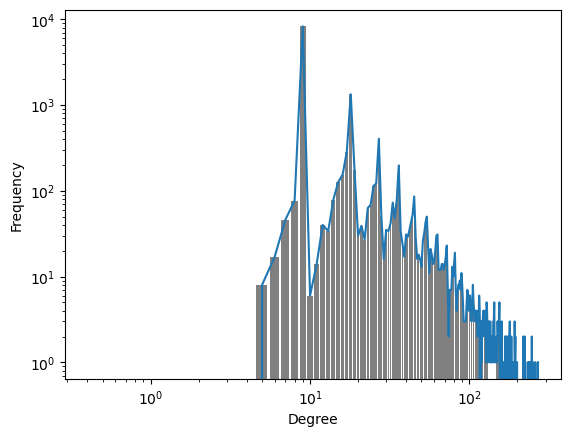

In [23]:
# plot the degree distribution with bar chart whit log scale
plt.bar(range(len(average_degree_users)), average_degree_users, align='center', color = 'gray')
plt.loglog(range(len(average_degree_users)), average_degree_users)
# plt.yscale('log')
# plt.title("Degree distribution of users")
plt.ylabel("Frequency")
plt.xlabel("Degree")
plt.savefig("powerlaw.png", format="png", dpi=300, bbox_inches="tight")

plt.show()

In [25]:
overall_avg_shortest_path_length,avg_shortest_path_lengths = average_shortest_path_length(largest_connected_subgraph_d)
print("average shortest path length of users graph: ", overall_avg_shortest_path_length)

average shortest path length of users graph:  3.905671532165673


In [18]:

import powerlaw
degrees = [largest_connected_subgraph.degree(n) for n in largest_connected_subgraph.nodes()]
fit = powerlaw.Fit(degrees)
alpha = fit.alpha
print("alpha:", alpha)



alpha: 3.273345657887041


Calculating best minimal value for power law fit
/home/francesco/anaconda3/envs/Network Analysis/lib/python3.11/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /


In [19]:
# Small-worldness and random graphs
m = largest_connected_subgraph.number_of_edges()
n = largest_connected_subgraph.number_of_nodes()
p = m / (n*(n-1)/2)  # probability of having an edge between any two nodes
graph_er = nx.erdos_renyi_graph(len(largest_connected_subgraph_d), p, directed=True)

#nx.info(graph_er)

In [20]:
#calculate clustering coefficient of users subgraph
clustering_coefficient = nx.average_clustering(largest_connected_subgraph)
print("Clustering coefficient: ", clustering_coefficient)

Clustering coefficient:  0.7779605217704507


In [21]:
print("Clustering coefficient normal graph ", clustering_coefficient)
clustering_coefficient_er = nx.average_clustering(graph_er)
print("Clustering coefficient of Erdos-Renyi graph: ", clustering_coefficient_er)

Clustering coefficient normal graph  0.7779605217704507
Clustering coefficient of Erdos-Renyi graph:  0.0013660831116788941


In [28]:
print("average shortest path length of normal graph: ", overall_avg_shortest_path_length)
# calculate the average shortest path length of the ER graph
overall_avg_shortest_path_length_er,avg_shortest_path_lengths_er= average_shortest_path_length(graph_er)
print("average shortest path length of ER user graph: ", overall_avg_shortest_path_length_er)

average shortest path length of normal graph:  3.905671532165673
average shortest path length of ER user graph:  3.582089288151814


In [29]:
sigma = sigma(clustering_coefficient,clustering_coefficient_er,overall_avg_shortest_path_length,overall_avg_shortest_path_length_er)
print("sigma of users graph: ", sigma)

sigma of users graph:  522.3013246996618


In [30]:
# Calculate the equivalent lattice network with the same number of nodes and edges as the original graph
n = len(largest_connected_subgraph_d.nodes())
k = len(largest_connected_subgraph_d.edges()) // n  # The average degree of the original graph
p = clustering_coefficient / k  # The probability of rewiring edges
lattice = nx.watts_strogatz_graph(n, k, p)

# Calculate the average shortest path length and clustering coefficient of the lattice network
lattice_avg_shortest_path_length = nx.average_shortest_path_length(lattice)
lattice_clustering_coefficient = nx.average_clustering(lattice)

omega = ((overall_avg_shortest_path_length_er/overall_avg_shortest_path_length) - (clustering_coefficient/lattice_clustering_coefficient))

print("omega of users graph: ", omega)

omega of users graph:  -0.33895793495216975
